In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
df.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

In [12]:
X_raw = df.iloc[:,:13]
Y_raw = df.iloc[:,[13]]

In [13]:
print('Shape of X: ',X_raw.shape)

Shape of X:  (297, 13)


In [14]:
print('Shape of X: ',Y_raw.shape)

Shape of X:  (297, 1)


In [15]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.3 KB


In [30]:
import copy
X = copy.deepcopy(X_raw)
Y = copy.deepcopy(Y_raw)

In [31]:
Y = np.squeeze(Y)
print(Y.shape)

(297,)


In [34]:
n_pos = (Y == 1).sum()
n_neg = (Y == 0).sum()
print(f'{n_pos} positive samples and {n_neg} negative samples.')

137 positive samples and 160 negative samples.


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
print(len(Y_train),len(Y_test))

237 60


In [37]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0,fit_prior=True)
clf.fit(X_train,Y_train)

MultinomialNB()

In [38]:
prediction_prob = clf.predict_proba(X_test)
print(prediction_prob[0:10])

[[3.24375152e-02 9.67562485e-01]
 [9.30577932e-01 6.94220682e-02]
 [9.27196257e-01 7.28037430e-02]
 [9.99985164e-01 1.48364402e-05]
 [4.68518534e-01 5.31481466e-01]
 [5.54614647e-02 9.44538535e-01]
 [1.10026638e-06 9.99998900e-01]
 [3.70475128e-07 9.99999630e-01]
 [4.12944636e-04 9.99587055e-01]
 [9.99843005e-01 1.56994981e-04]]


In [39]:
prediction = clf.predict(X_test)

In [40]:
print(prediction[:10])

[1 0 0 0 1 1 1 1 1 0]


In [41]:
accuracy = clf.score(X_test,Y_test)
print(f'The accuracy is : {accuracy*100:.1f}%')

The accuracy is : 60.0%


In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,prediction,labels=[0,1]))

[[19 13]
 [11 17]]


In [43]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(Y_test,prediction,pos_label=1)

0.5666666666666667

In [44]:
recall_score(Y_test,prediction,pos_label=1)

0.6071428571428571

In [45]:
f1_score(Y_test,prediction,pos_label=1)

0.5862068965517241

In [47]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.59      0.61        32
           1       0.57      0.61      0.59        28

    accuracy                           0.60        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.60      0.60      0.60        60



In [50]:
pos_prob = prediction_prob[:,1]
thresholds = np.arange(0.0,1.1,0.05)
true_pos,false_pos = [0]*len(thresholds),[0]*len(thresholds)
for pred,y in zip(pos_prob,Y_test):
    for i,threshold in enumerate(thresholds):
        if pred >= threshold:
            if y == 1:
                true_pos[i] += 1
            else:
                false_pos[i] += 1
        else:
            break

In [51]:
n_pos_test = (Y_test==1).sum()
n_neg_test = (Y_test==0).sum()
true_pos_rate = [tp/n_pos_test for tp in true_pos]
false_pos_rate = [fp/n_neg_test for fp in false_pos]

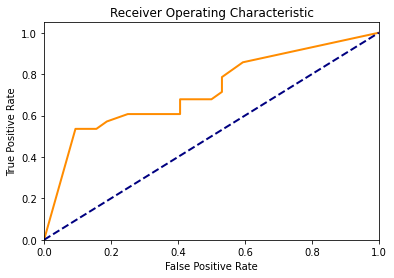

In [54]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_pos_rate,true_pos_rate,color='darkorange',lw=lw)
plt.plot([0,1],[0,1],color = 'navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
#plt.legend(loc="lower right")
plt.show()

In [117]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,pos_prob)

0.7615740740740741

In [146]:
from sklearn.model_selection import StratifiedKFold
k = 5
k_fold = StratifiedKFold(n_splits=k)

In [150]:
smoothing_factor_option = [1,2,3,4,5,6]
fit_prior_option = [True,False]
auc_record ={}

In [151]:
for train_indices,test_indices in k_fold.split(X,Y):
    X_train,X_test = X.iloc[train_indices,:],X.iloc[test_indices,:]
    Y_train,Y_test = Y[train_indices],Y[test_indices]
    for alpha in smoothing_factor_option:
        if alpha not in auc_record:
            auc_record[alpha] = {}
        for fit_prior in fit_prior_option:
            clf = MultinomialNB(alpha=alpha,fit_prior=fit_prior)
            clf.fit(X_train,Y_train)
            prediction_prob = clf.predict_proba(X_test)
            pos_prob = prediction_prob[:,1]
            auc = roc_auc_score(Y_test,pos_prob)
            auc_record[alpha][fit_prior] = auc + auc_record[alpha].get(fit_prior,0.0)

In [152]:
for smoothing,smoothing_record in auc_record.items():
    for fit_prior,auc in smoothing_record.items():
        print(f'    {smoothing}    {fit_prior}    {auc/k:.5f}')

    1    True    0.85430
    1    False    0.85430
    2    True    0.85408
    2    False    0.85408
    3    True    0.85363
    3    False    0.85363
    4    True    0.85363
    4    False    0.85363
    5    True    0.85271
    5    False    0.85271
    6    True    0.85203
    6    False    0.85203


In [153]:
#  1    True    0.85430